# Model Training: Forwards - Linear Regression

The task here will be to train a model to predict that value of NHL players who play the Forward position. Choice of features is based on the EDA done in 01_F_EDA.ipynb (Folder 4_ExploratoryDataAnalysis)

## Import our data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector

In [13]:
# Load in our data
filepath = '../../Data/entitiesResolved/merged_data_final.csv'
data = pd.read_csv(filepath)

## Features to try:

Recall that the EDA done revealed that we should try to use the following features:

1. TOI/GP
2. TOTAL POINTS - although we may want to split this up into TOTAL ASSISTS and GOALS instead
3. TOTAL ASSISTS - although we may want to split this up into FIRST ASSISTS and SECOND ASSISTS instead
4. XGF/60 - This may not make sense to use, since it is so closely tied to XGA, which is part of the intersection
5. ON THE FLY STARTS/60 - This is probably covered by TOI/GP which it has a -.75 correlation with
6. OFF. ZONE FACEOFFS/60 - May make sense to be integrated into the PCA as it is a bit of a nuanced statistic
7. TOTAL POINTS/60 - Is too closely linked to TOTAL POINTS. We should use one or the other.
8. SHOTS - I think this would be a good metric to try to include.
9. GOALS - I think it goes without saying that we should use Goals.
10. We may want to include 'LDGF', 'OFF. ZONE STARTS', 'LDCF', 'MDGF', 'OFF. ZONE FACEOFFS',
       'HDCF', 'CF', 'FF', 'SF', 'MDCF', 'SCF', 'XGF', 'ICF', 'HDGF', 'IFF',
       'ISCF', 'IXG', 'GF' as a PCA

In [14]:
# # THE FOLLOWING CELL UTILIZES MANUAL FEATURE SELECTION

# forwards = data[data['POSITION'].isin(['r', 'l', 'c, l', 'c', 'l, r', 'c, r'])]

# # Select only players with 60 or more games played
# forwards = forwards[(forwards['GP'] >= 41)]

# # Remove players from season 2023-24    
# forwards = forwards[(forwards['SEASON'] != '2023-24')]

# # Remove outliers
# test_train_data = forwards

# # Select the features we want to use# Define the feature sets more clearly
# numerical_features = ['FIRST ASSISTS', 'SECOND ASSISTS', 'GOALS']  # These are to be scaled but not reduced - removed: 'XGF/60' , 'SHOTS'
# pca_features = [] #['LDGF', 'OFF.\xa0ZONE STARTS', 'LDCF', 'MDGF', 'OFF.\xa0ZONE FACEOFFS',
#                 #'HDCF', 'CF', 'FF', 'SF', 'MDCF', 'SCF', 'XGF', 'ICF', 'HDGF', 
#                 #'IFF', 'ISCF', 'IXG', 'GF', 'XGF/60', 'SHOTS']  # Features for PCA

# # Define transformers for the column transformer
# transformers = [
#     ('num', StandardScaler(), numerical_features),
#     ('pca', make_pipeline(StandardScaler(), PCA(n_components=0)), pca_features)
# ]

# preprocessor = ColumnTransformer(transformers=transformers)

# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', LinearRegression())
# ])

# X = test_train_data.drop('SALARY CAP PERCENTAGE', axis=1)
# y = test_train_data['SALARY CAP PERCENTAGE']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# pipeline.fit(X_train, y_train)
# y_pred = pipeline.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')

In [22]:
data.columns.tolist()

['POSITION',
 'PLAYER',
 'TEAM',
 'TOI',
 'GP',
 'TOI/GP',
 'GOALS/60',
 'TOTAL ASSISTS/60',
 'FIRST ASSISTS/60',
 'SECOND ASSISTS/60',
 'TOTAL POINTS/60',
 'IPP',
 'SHOTS/60',
 'SH%',
 'IXG/60',
 'ICF/60',
 'IFF/60',
 'ISCF/60',
 'IHDCF/60',
 'RUSH ATTEMPTS/60',
 'REBOUNDS CREATED/60',
 'PIM/60',
 'TOTAL PENALTIES/60',
 'MINOR/60',
 'MAJOR/60',
 'MISCONDUCT/60',
 'PENALTIES DRAWN/60',
 'GIVEAWAYS/60',
 'TAKEAWAYS/60',
 'HITS/60',
 'HITS TAKEN/60',
 'SHOTS BLOCKED/60',
 'FACEOFFS WON/60',
 'FACEOFFS LOST/60',
 'FACEOFFS %',
 'CF/60',
 'CA/60',
 'CF%',
 'FF/60',
 'FA/60',
 'FF%',
 'SF/60',
 'SA/60',
 'SF%',
 'GF/60',
 'GA/60',
 'GF%',
 'XGF/60',
 'XGA/60',
 'XGF%',
 'SCF/60',
 'SCA/60',
 'SCF%',
 'HDCF/60',
 'HDCA/60',
 'HDCF%',
 'HDGF/60',
 'HDGA/60',
 'HDGF%',
 'MDCF/60',
 'MDCA/60',
 'MDCF%',
 'MDGF/60',
 'MDGA/60',
 'MDGF%',
 'LDCF/60',
 'LDCA/60',
 'LDCF%',
 'LDGF/60',
 'LDGA/60',
 'LDGF%',
 'ON-ICE SH%',
 'ON-ICE SV%',
 'PDO',
 'OFF.\xa0ZONE STARTS/60',
 'NEU.\xa0ZONE STARTS/60',


In [25]:
# THE FOLLOWING CELL UTILIZES SEQUENTIAL FEATURE SELECTION USING SequentialFeatureSelector from sklearn.feature_selection

forwards = data[data['POSITION'].isin(['r', 'l', 'c, l', 'c', 'l, r', 'c, r'])]

# Select only players with 60 or more games played
forwards = forwards[(forwards['GP'] >= 41)]

# Remove players from season 2023-24    
forwards = forwards[(forwards['SEASON'] != '2023-24')]

# Remove outliers
test_train_data = forwards

# Get all numerical features from test_train_data that do not have NaN values
numerical_features = test_train_data.select_dtypes(include=['float64', 'int64']).columns[test_train_data.select_dtypes(include=['float64', 'int64']).isnull().sum() == 0]
numerical_features = numerical_features.drop(['CAP HIT',
                                            'AAV',
                                            'SALARY',
                                            'BASE SALARY',
                                            'S.BONUS',
                                            'P.BONUS',
                                            'SALARY CAP',
                                            'SALARY CAP PERCENTAGE'])

# Define transformers for the numerical features
transformers = [
    ('num', StandardScaler(), numerical_features)
]

preprocessor = ColumnTransformer(transformers=transformers)

# Define a linear regression model
linear_regression_model = LinearRegression()

# Define the Sequential Feature Selector with the Linear Regression model
sfs = SequentialFeatureSelector(linear_regression_model, n_features_to_select='auto', direction='forward', scoring='neg_mean_squared_error')

# Create a pipeline that includes the preprocessor, SFS, and the regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('sfs', sfs),
    ('regressor', linear_regression_model)
])

# Split your data
X = test_train_data[numerical_features]  # Ensure these are the features before any dropping
y = test_train_data['SALARY CAP PERCENTAGE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0002440516163624797


In [27]:
coefficients = pipeline.named_steps['regressor'].coef_
feature_names = numerical_features
coefficient_names = feature_names

for name, coef in zip(coefficient_names, coefficients):
    print(f'{name}: {coef}')


TOI: 0.006250163656772664
GP: 0.0012557940807276045
TOI/GP: -0.021138862854550317
GOALS/60: 0.010048336161038271
TOTAL ASSISTS/60: -0.030794014526268176
FIRST ASSISTS/60: -0.017048613553031423
SECOND ASSISTS/60: 0.036103725868220485
TOTAL POINTS/60: 0.0018728237073047248
SHOTS/60: -0.0012913029429990203
SH%: -0.002819708787080448
IXG/60: 0.0027808794955552305
ICF/60: -0.001914526795735394
IFF/60: -0.002393309543461744
ISCF/60: -0.002452020188060112
IHDCF/60: 0.0005327971027857363
RUSH ATTEMPTS/60: -0.0021757588615379246
REBOUNDS CREATED/60: 0.001194803427643597
PIM/60: 0.006461770653665992
TOTAL PENALTIES/60: 0.0009756634639361836
MINOR/60: -0.023697003883582885
MAJOR/60: 0.020539173945123175
MISCONDUCT/60: 0.0013983729253282465
PENALTIES DRAWN/60: 0.0028807844855780057
GIVEAWAYS/60: 0.004306889328260063
TAKEAWAYS/60: 0.0019704981242409103
HITS/60: -0.007523234560674713
HITS TAKEN/60: -0.00043155780665859317
SHOTS BLOCKED/60: -0.0007588260750270789
FACEOFFS WON/60: 0.003658542435359839

In [28]:
def convert_to_dollars(df, col):
    return df[col].map('${:,.2f}'.format)

def invert_convert_to_dollars(df, col):
    return df[col].str.replace('$', '').str.replace(',', '').astype(float)


In [29]:
# Create a feature column in Centers for the predicted salary
forwards['PRED_SALARY_PERCENTAGE'] = pipeline.predict(forwards)

# Create a column for the actual predicted salary
forwards['PRED_AAV'] = forwards['PRED_SALARY_PERCENTAGE'] * forwards['SALARY CAP']
forwards['PRED_AAV'] = forwards['PRED_AAV'].astype(int)

# Compute the differential between the predicted and actual salary
forwards['DIFF'] = forwards['PRED_AAV'] - forwards['AAV']

# Convert to dollars
forwards['PRED_AAV'] = convert_to_dollars(forwards, 'PRED_AAV')
forwards['AAV'] = convert_to_dollars(forwards, 'AAV')
forwards['DIFF'] = convert_to_dollars(forwards, 'DIFF')

In [30]:
# Display the full record of the top 20 players based on 'PRED_SALARY_PERCENTAGE' 
top_20 = forwards.sort_values('PRED_SALARY_PERCENTAGE', ascending=False).head(20)
top_20[['PLAYER', 'SEASON', 'AAV', 'PRED_AAV', 'DIFF', 'PRED_SALARY_PERCENTAGE']]

,PLAYER,SEASON,AAV,PRED_AAV,DIFF,PRED_SALARY_PERCENTAGE
2555,ilya kovalchuk,2011-12,"$6,666,666.00","$13,041,105.00","$6,374,439.00",0.202817
1866,ilya kovalchuk,2010-11,"$6,666,666.00","$10,886,382.00","$4,219,716.00",0.183272
1012,alex ovechkin,2009-10,"$9,538,462.00","$10,319,918.00","$781,456.00",0.181689
449,alex ovechkin,2008-09,"$9,538,462.00","$10,086,213.00","$547,751.00",0.177887
4441,sidney crosby,2013-14,"$8,700,000.00","$10,303,835.00","$1,603,835.00",0.160246
1628,alex ovechkin,2010-11,"$9,538,462.00","$9,385,951.00","$-152,511.00",0.158013
8632,sidney crosby,2018-19,"$8,700,000.00","$11,828,972.00","$3,128,972.00",0.148792
2985,alex ovechkin,2012-13,"$9,538,462.00","$8,921,495.00","$-616,967.00",0.148692
12047,sidney crosby,2022-23,"$8,700,000.00","$12,018,733.00","$3,318,733.00",0.145682
7787,sidney crosby,2017-18,"$8,700,000.00","$10,885,435.00","$2,185,435.00",0.145139


In [32]:
# Display all seasons for Connor McDavid
connor_mcdavid = forwards[forwards['PLAYER'] == 'connor mcdavid']
connor_mcdavid[['PLAYER', 'SEASON', 'AAV', 'PRED_AAV', 'DIFF', 'PRED_SALARY_PERCENTAGE']]

,PLAYER,SEASON,AAV,PRED_AAV,DIFF,PRED_SALARY_PERCENTAGE
5587,connor mcdavid,2015-16,"$3,775,000.00","$2,844,748.00","$-930,252.00",0.039842
6437,connor mcdavid,2016-17,"$3,775,000.00","$4,056,104.00","$281,104.00",0.055563
7261,connor mcdavid,2017-18,"$3,775,000.00","$4,206,353.00","$431,353.00",0.056085
8093,connor mcdavid,2018-19,"$12,500,000.00","$9,082,933.00","$-3,417,067.00",0.114251
8927,connor mcdavid,2019-20,"$12,500,000.00","$10,252,134.00","$-2,247,866.00",0.125793
9730,connor mcdavid,2020-21,"$12,500,000.00","$10,755,975.00","$-1,744,025.00",0.131975
10590,connor mcdavid,2021-22,"$12,500,000.00","$9,795,905.00","$-2,704,095.00",0.120195
11482,connor mcdavid,2022-23,"$12,500,000.00","$10,489,261.00","$-2,010,739.00",0.127143


Text(0.5, 1.0, 'Distribution of Predicted Salary Percentage for Centers')

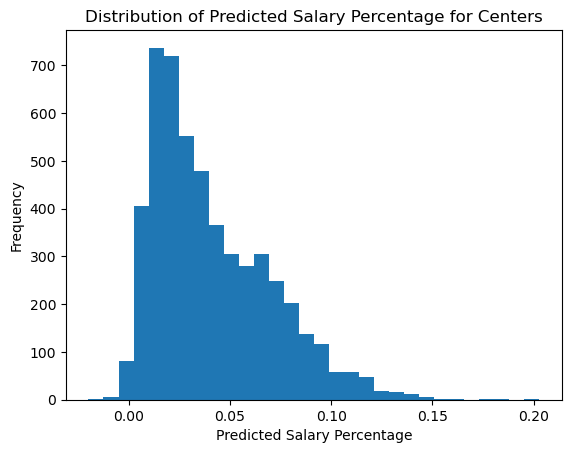

In [31]:
# Plot the distribution of PRED_SALARY_PERCENTAGE
plt.hist(forwards['PRED_SALARY_PERCENTAGE'], bins=30)
plt.xlabel('Predicted Salary Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Salary Percentage for Centers')

Text(0.5, 1.0, 'Distribution of Actual Salary Percentage for Centers')

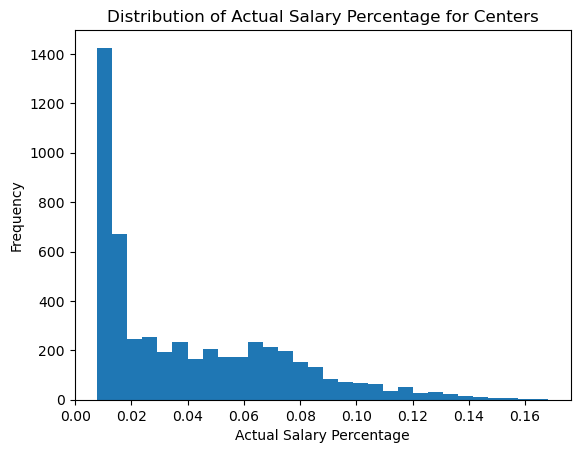

In [11]:
# Plot the distribution of Y_SALARY_CAP_PERCENTAGE
plt.hist(forwards['SALARY CAP PERCENTAGE'], bins=30)
plt.xlabel('Actual Salary Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Actual Salary Percentage for Centers')

In [ ]:
# Filter players with over 41 GP
filtered_data = forwards[(forwards['GP'] > 60) & (forwards['SEASON'] == '2023-24')].copy()

# Convert AAV and PRED_SALARY_CAP_AAV back to float
filtered_data['AAV'] = invert_convert_to_dollars(filtered_data, 'AAV')
filtered_data['PRED_AAV'] = invert_convert_to_dollars(filtered_data, 'PRED_AAV')

# Calculate differential between AAV and PRED_SALARY_CAP_AAV
filtered_data['Differential'] = filtered_data['PRED_AAV'] - filtered_data['AAV']

# Sort by differential in descending order
filtered_data = filtered_data.sort_values('Differential', ascending=False)

# Convert AAV and PRED_SALARY_CAP_AAV back to $
filtered_data['AAV'] = convert_to_dollars(filtered_data, 'AAV')
filtered_data['PRED_AAV'] = convert_to_dollars(filtered_data, 'PRED_AAV')

# Select top 5 players with largest differentials
top_players = filtered_data.head(10)

top_players[['TEAM'] + display_features + ['Differential']]

,TEAM,PLAYER,SEASON,GP,TOTAL ASSISTS/60,GOALS/60,SCF/60,FF/60,HDCF/60,CF/60,...,XGF/60,GF/60,ON THE FLY STARTS/60,OFF. ZONE FACEOFFS/60,HDGF/60,SALARY CAP PERCENTAGE,PRED_SALARY_PERCENTAGE,AAV,PRED_AAV,Differential
12849,car,seth jarvis,2023-24,70,1.38,1.19,33.81,50.70,14.32,71.71,...,3.78,4.50,33.31,26.52,2.02,0.010709,0.080128,"$1,394,167.00","$6,690,722.00",5296555.0
12398,fla,evan rodrigues,2023-24,67,1.50,0.58,34.85,55.43,14.97,77.04,...,3.89,3.47,41.09,24.04,2.02,0.035928,0.098288,"$3,000,000.00","$8,207,066.00",5207066.0
12506,min,joel eriksson ek,2023-24,66,1.37,1.28,36.27,52.44,15.51,71.92,...,4.29,4.63,25.87,26.93,1.98,0.062874,0.096753,"$5,250,000.00","$8,078,856.00",2828856.0
12705,ari,nick bjugstad,2023-24,68,1.07,0.86,27.92,42.05,11.34,57.06,...,3.12,3.20,39.31,17.19,1.22,0.025150,0.056120,"$2,100,000.00","$4,686,000.00",2586000.0
12629,wpg,mark scheifele,2023-24,62,1.96,1.05,33.88,49.40,14.23,68.09,...,3.92,4.50,31.29,31.58,2.49,0.073353,0.098489,"$6,125,000.00","$8,223,813.00",2098813.0
12619,min,marco rossi,2023-24,70,0.88,0.94,31.65,48.17,13.04,67.40,...,3.28,2.75,40.64,22.19,1.46,0.010339,0.044598,"$1,713,333.00","$3,723,967.00",2010634.0
12296,col,casey mittelstadt,2023-24,67,1.73,0.79,30.93,49.04,12.27,65.46,...,3.43,4.30,34.69,27.66,1.39,0.029940,0.045192,"$2,500,000.00","$3,773,520.00",1273520.0
12298,vgk,chandler stephenson,2023-24,65,1.35,0.75,27.70,44.17,11.68,61.39,...,3.24,3.19,35.58,26.95,1.55,0.032934,0.044662,"$2,750,000.00","$3,729,269.00",979269.0
12294,fla,carter verhaeghe,2023-24,69,1.74,1.45,45.34,61.39,19.04,87.24,...,4.89,5.08,37.94,29.15,2.56,0.049900,0.060856,"$4,166,667.00","$5,081,473.00",914806.0
12759,vgk,paul cotter,2023-24,65,1.07,0.50,28.93,41.22,11.07,59.22,...,2.70,2.29,42.79,16.93,1.21,0.009281,0.020160,"$775,000.00","$1,683,393.00",908393.0


In [ ]:
# Show all players who have a negative differential
filtered_data[filtered_data['Differential'] < 0][['TEAM'] + display_features + ['Differential']]

,TEAM,PLAYER,SEASON,GP,TOTAL ASSISTS/60,GOALS/60,SCF/60,FF/60,HDCF/60,CF/60,...,XGF/60,GF/60,ON THE FLY STARTS/60,OFF. ZONE FACEOFFS/60,HDGF/60,SALARY CAP PERCENTAGE,PRED_SALARY_PERCENTAGE,AAV,PRED_AAV,Differential
12866,tbl,steven stamkos,2023-24,66,1.79,1.34,36.67,51.46,13.50,72.06,...,4.03,4.76,34.04,29.58,1.79,0.101796,0.101266,"$8,500,000.00","$8,455,741.00",-44259.0
12828,van,sam lafferty,2023-24,67,0.82,0.82,24.58,36.19,10.49,52.30,...,2.44,2.62,60.17,15.29,1.87,0.013772,0.013217,"$1,150,000.00","$1,103,591.00",-46409.0
12678,cgy,mikael backlund,2023-24,68,1.05,0.68,29.40,46.67,12.03,63.53,...,3.58,3.10,38.42,16.59,1.60,0.064072,0.063502,"$5,350,000.00","$5,302,385.00",-47615.0
12878,ott,tim stützle,2023-24,68,1.96,0.71,36.41,53.17,14.30,74.36,...,3.96,3.71,41.71,24.86,1.75,0.100000,0.099277,"$8,350,000.00","$8,289,667.00",-60333.0
12385,van,elias lindholm,2023-24,70,1.17,0.56,29.14,45.07,12.04,62.98,...,3.38,2.85,35.74,27.15,1.17,0.058084,0.057107,"$4,850,000.00","$4,768,468.00",-81532.0
12314,wpg,cole perfetti,2023-24,63,1.18,0.97,28.07,48.45,11.92,67.03,...,3.05,3.40,46.37,25.51,1.66,0.010709,0.017854,"$1,627,500.00","$1,490,813.00",-136687.0
12574,fla,kevin stenlund,2023-24,68,0.28,0.70,16.95,31.86,7.21,45.45,...,2.04,1.47,50.35,12.96,0.56,0.011976,0.010160,"$1,000,000.00","$848,335.00",-151665.0
12227,tor,auston matthews,2023-24,67,1.36,2.42,42.82,57.34,19.50,78.20,...,4.64,5.31,34.66,27.40,2.63,0.139404,0.137511,"$11,640,250.00","$11,482,197.00",-158053.0
12799,stl,robert thomas,2023-24,70,2.04,0.94,34.67,48.89,13.61,66.88,...,3.92,3.92,28.66,26.29,1.84,0.097305,0.095257,"$8,125,000.00","$7,953,966.00",-171034.0
12528,cgy,jonathan huberdeau,2023-24,67,1.75,0.46,35.74,52.46,14.19,74.52,...,3.98,3.29,42.63,31.52,1.65,0.125749,0.123696,"$10,500,000.00","$10,328,579.00",-171421.0


In [ ]:
# Truncate the lowest valued predictions to the minimum value for each season

# Step 1: Group the data by 'SEASON' and find the minimum value of 'Y_SALARY_CAP_PERCENTAGE' for each season
min_salary_by_season = centers.groupby('SEASON')['SALARY CAP PERCENTAGE'].min()

# Step 2: Merge the minimum values back into the original dataframe based on the 'SEASON' column
centers = centers.merge(min_salary_by_season, on='SEASON', suffixes=('', '_MIN'))

# Step 3: Update the predictions in 'PRED_SALARY_PERCENTAGE' column if they are lower than the minimum value
centers['PRED_SALARY_PERCENTAGE'] = centers.apply(lambda row: max(row['PRED_SALARY_PERCENTAGE'], row['SALARY CAP PERCENTAGE_MIN']), axis=1)

# Step 4: Update the 'PRED_SALARY_PERCENTAGE' column in the dataframe with the updated predictions
centers['PRED_SALARY_PERCENTAGE'] = centers['PRED_SALARY_PERCENTAGE']
